# Introducción al Perceptrón
Los perceptrones fueron uno de los primeros algoritmos descubiertos en el campo de la IA. Su gran importancia fue que despertaron esperanzas y expectativas en el campo de las redes neuronales. Es un algoritmo de aprendizaje automático que utiliza un solo nodo o neurona para predecir una etiqueta de clase para una fila de datos. Es un tipo de modelo de red neuronal y se considera uno de los tipos más simples.

**El algoritmo del perceptrón consta de cuatro componentes principales:**
- Valores de entrada
- Pesos y sesgo
- Suma neta
- Función de activación

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

## Creación del conjunto de datos
Se crea un conjunto de datos con 2 características de entrada y etiquetas de destino binarias.

In [ ]:
# Dataset alternativo con puntos creados al azar
# features, targets = make_classification(n_samples = 20, n_features = 2, n_informative = 1, n_redundant = 0, n_clusters_per_class = 1, random_state = 1)
# targets

In [34]:
# Crear los datos
features = np.array([[1,1], [2,0.5], [1,2], [-1,-1], [-1,-2], [-2,-1.5], [2,-2]])
targets = np.array([1, 1, 1, 0, 0, 0, 0])

# Crear el DataFrame
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets

df.head(10)

,x1,x2,targets
0,1.0,1.0,1
1,2.0,0.5,1
2,1.0,2.0,1
3,-1.0,-1.0,0
4,-1.0,-2.0,0
5,-2.0,-1.5,0
6,2.0,-2.0,0


In [35]:
features.shape

(7, 2)

In [36]:
targets.shape

(7,)

# Visualización del conjunto de datos
Podemos visualizar el conjunto de datos trazando las dos características de entrada coloreadas por la clase de destino. Esto nos da una idea de cuán linealmente separables son los datos. Podemos ver que habría un límite de decisión lineal aproximado que separa las dos clases.

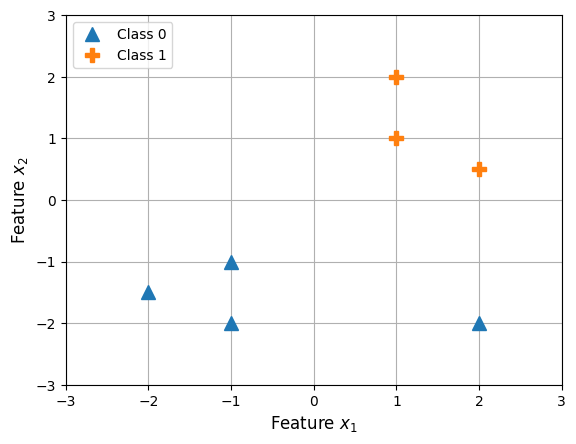

In [37]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'

)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 2)

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

# Implementación de un perceptrón
Ahora podemos implementar el algoritmo del perceptrón. El perceptrón contiene parámetros de ponderación (pesos) y sesgo que se pueden actualizar durante el entrenamiento.

In [39]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

In [40]:
ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [41]:
ppn.bias

0

## Implementación de la función de avance
El función de avance calcula la suma ponderada de las entradas y el sesgo. Una función de activación establece un umbral para esta suma y produce una predicción binaria 0/1.

In [42]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [43]:
ppn = Perceptron(num_features = 0)

x = [2, 0.5]
ppn.forward(x)

0

La predicción en el caso anterior es 0 porque los pesos del perceptrón son 0 y aún no está aprendiendo nada.

## Actualización de los pesos
El método de actualización toma un ejemplo de entrenamiento y una etiqueta verdadera, compara la predicción con la verdad y actualiza los pesos y el sesgo en consecuencia. Aquí es donde se produce el aprendizaje.

In [44]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        # Updating the weights
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [45]:
ppn = Perceptron(num_features = 2)

x = [2, 0.5]
ppn.update(x, y_true = 1)

1

In [46]:
print("Model parameters")
print("----------------")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters
----------------
Weights: [2.0, 0.5]
Bias: 1


# Entrenamiento del modelo
Entrenamos el perceptrón mediante la ejecución iterativa de ejemplos y la actualización de los pesos/sesgos del modelo para reducir el error de predicción. Después del entrenamiento durante varias iteraciones (epochs), los pesos del modelo deberían haber convergido para brindar una buena precisión de predicción.

In [47]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [48]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 2
Epoch 2 errors 1
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


# Evaluación del modelo
Podemos evaluar el modelo en los datos de entrenamiento comparando sus predicciones con las etiquetas reales y calculando la precisión de la predicción.

In [49]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [50]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 1.0


# Trazado del límite de decisión
Por último, podemos visualizar el límite de decisión lineal del perceptrón trazando la línea definida por sus parámetros de peso aprendidos. Esto separa las dos clases e ilustra el hiperplano divisor del perceptrón. En general, esto demuestra cómo un modelo de perceptrón simple puede servir como un clasificador lineal a partir de datos. Si bien son limitados, los perceptrones son la base para los desarrollos posteriores de redes neuronales.

In [51]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

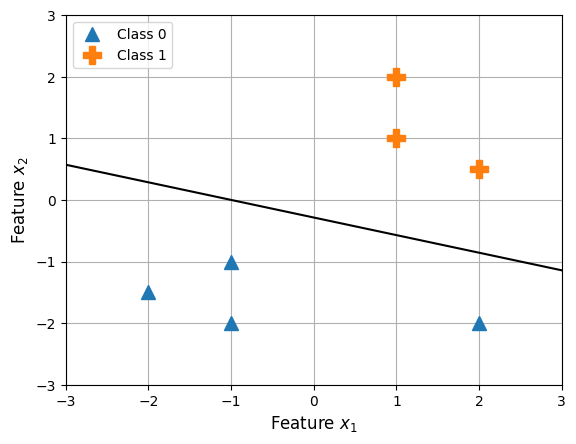

In [52]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="^",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="P",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## Entrenamiento de perceptrones para AND, OR y XOR

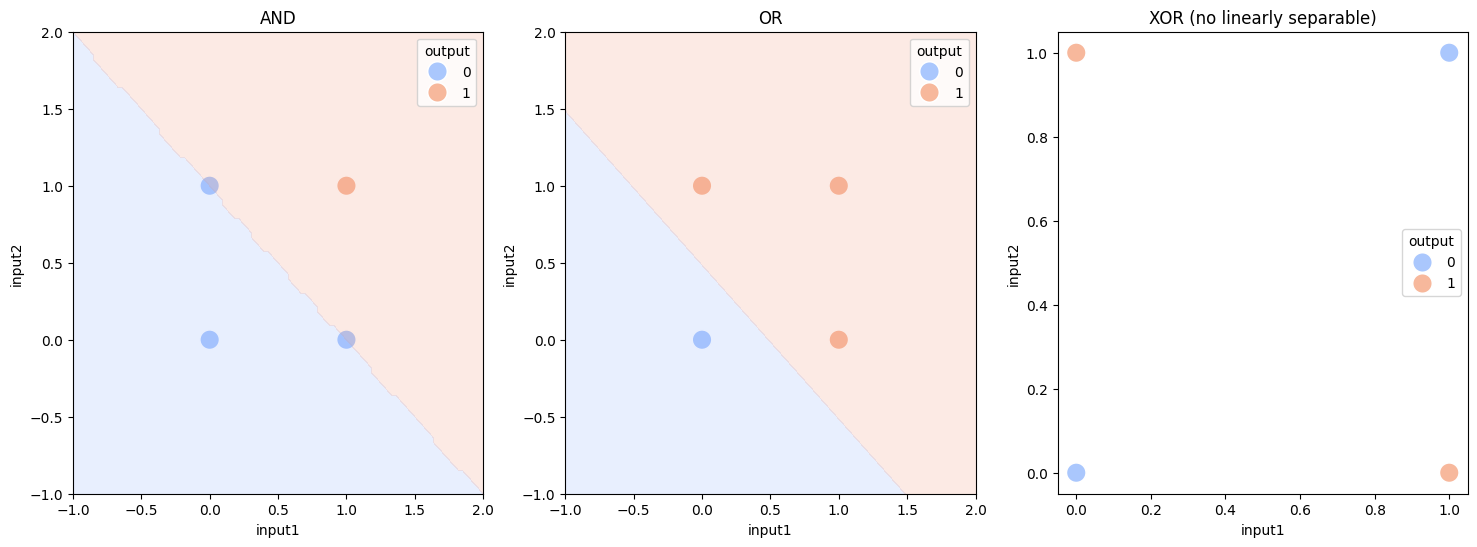

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Función para graficar la línea de decisión
def graficar_linea_decision(modelo, datos, ax):
    x_min, x_max = datos['input1'].min() - 1, datos['input1'].max() + 1
    y_min, y_max = datos['input2'].min() - 1, datos['input2'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Crear un DataFrame con los mismos nombres de columnas que los datos de entrenamiento
    grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['input1', 'input2'])

    # Hacer la predicción usando el modelo entrenado
    Z = modelo.predict(grid_data)
    Z = Z.reshape(xx.shape)

    # Graficar la línea de decisión
    ax.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], cmap="coolwarm")

# Creación de los DataFrames
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

or_data['input1'] = [1, 1, 0, 0]
or_data['input2'] = [1, 0, 1, 0]
or_data['output'] = [1, 1, 1, 0]

and_data['input1'] = [1, 1, 0, 0]
and_data['input2'] = [1, 0, 1, 0]
and_data['output'] = [1, 0, 0, 0]

xor_data['input1'] = [1, 1, 0, 0]
xor_data['input2'] = [1, 0, 1, 0]
xor_data['output'] = [0, 1, 1, 0]

# Definición de perceptrones
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

# Entrenamiento
clf1.fit(and_data[['input1', 'input2']], and_data['output'])
clf2.fit(or_data[['input1', 'input2']], or_data['output'])
clf3.fit(xor_data[['input1', 'input2']], xor_data['output'])

# Graficar datos AND, OR y XOR con sus curvas de decisión
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para AND
sns.scatterplot(x='input1', y='input2', hue='output', data=and_data, s=200, ax=axs[0], palette="coolwarm")
axs[0].set_title("AND")
graficar_linea_decision(clf1, and_data, axs[0])

# Gráfico para OR
sns.scatterplot(x='input1', y='input2', hue='output', data=or_data, s=200, ax=axs[1], palette="coolwarm")
axs[1].set_title("OR")
graficar_linea_decision(clf2, or_data, axs[1])

# Gráfico para XOR (sin curva de decisión válida para Perceptron)
sns.scatterplot(x='input1', y='input2', hue='output', data=xor_data, s=200, ax=axs[2], palette="coolwarm")
axs[2].set_title("XOR (no linearly separable)")

plt.show()

## MLP

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Creación del conjunto de datos XOR
xor_data = pd.DataFrame()
xor_data['input1'] = [1, 1, 0, 0]
xor_data['input2'] = [1, 0, 1, 0]
xor_data['output'] = [0, 1, 1, 0]

# Definir y entrenar el MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp.fit(xor_data[['input1', 'input2']], xor_data['output'])

# Función para graficar la línea de decisión para MLP
def graficar_linea_decision(modelo, datos, ax):
    x_min, x_max = datos['input1'].min() - 1, datos['input1'].max() + 1
    y_min, y_max = datos['input2'].min() - 1, datos['input2'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Crear un DataFrame con los mismos nombres de columnas que los datos de entrenamiento
    grid_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['input1', 'input2'])

    # Hacer la predicción usando el modelo entrenado
    Z = modelo.predict(grid_data)
    Z = Z.reshape(xx.shape)

    # Graficar la línea de decisión
    ax.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], cmap="coolwarm")

# Graficar datos XOR con la curva de decisión del MLP
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los puntos XOR
sns.scatterplot(x='input1', y='input2', hue='output', data=xor_data, s=200, ax=ax, palette="coolwarm")
ax.set_title("XOR - Multilayer Perceptron")

# Graficar la línea de decisión del MLP
graficar_linea_decision(mlp, xor_data, ax)

plt.show()
